In [66]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
df = pd.read_csv("/Users/HWAT/Desktop/CodingWork/cleaned_adult_data.csv")
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


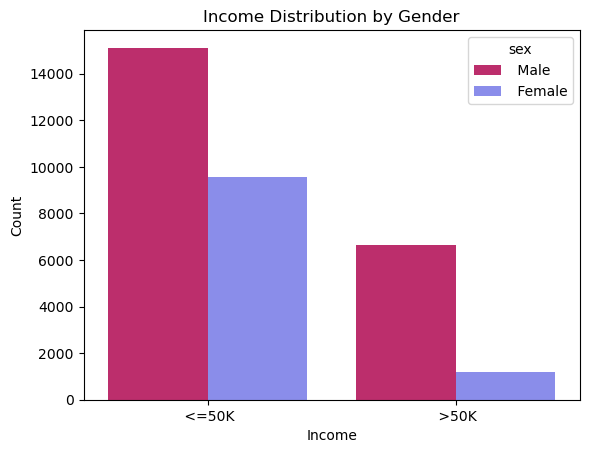

In [67]:
# bar chart : Income distribution by gender
colors = ['#d41669', '#7a7efa', '#ff87e3', '#0a60f9','#0fb61e','#a4c508','#8bf9cf','#82e37a','#f3f727','#ffeb72']
sns.countplot(x='income', hue='sex', data=df, palette=colors)
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

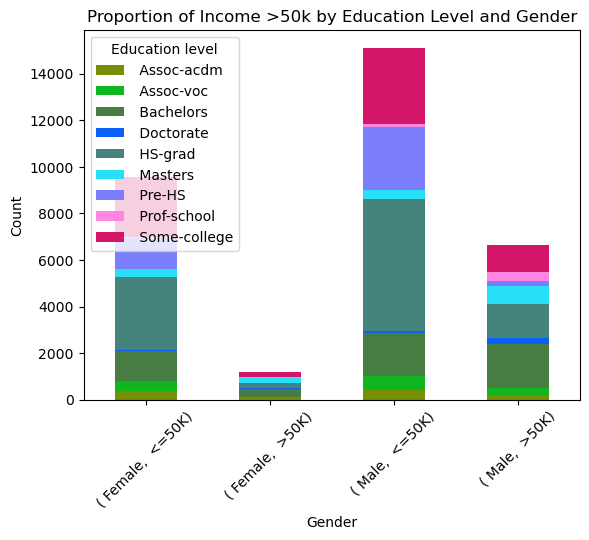

In [68]:
# grouped bar charted: looking at the proportions of income >50k, =<50k by gender and education level
colors = ['#778f04', '#0fb61e', '#477d42', '#0a60f9','#45847c','#27e0f7','#7a7efa','#ff87e3','#d41669','#b5641a']
grouped_data = df.groupby(['sex', 'income', 'education']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Proportion of Income >50k by Education Level and Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education level')
plt.show()

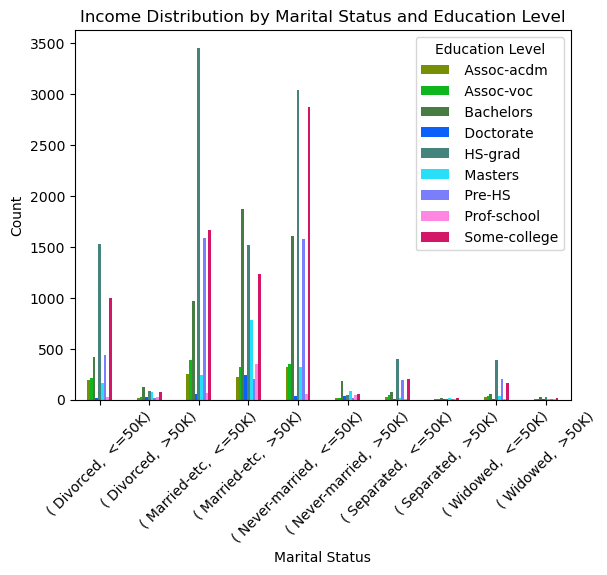

In [69]:
# clustered bar chart, comparing 
clustered_data = df.groupby(['marital_status', 'income', 'education']).size().unstack(fill_value=0)
colors = ['#778f04', '#0fb61e', '#477d42', '#0a60f9','#45847c','#27e0f7','#7a7efa','#ff87e3','#d41669','#b5641a']
clustered_data.plot(kind='bar', color=colors)
plt.title('Income Distribution by Marital Status and Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

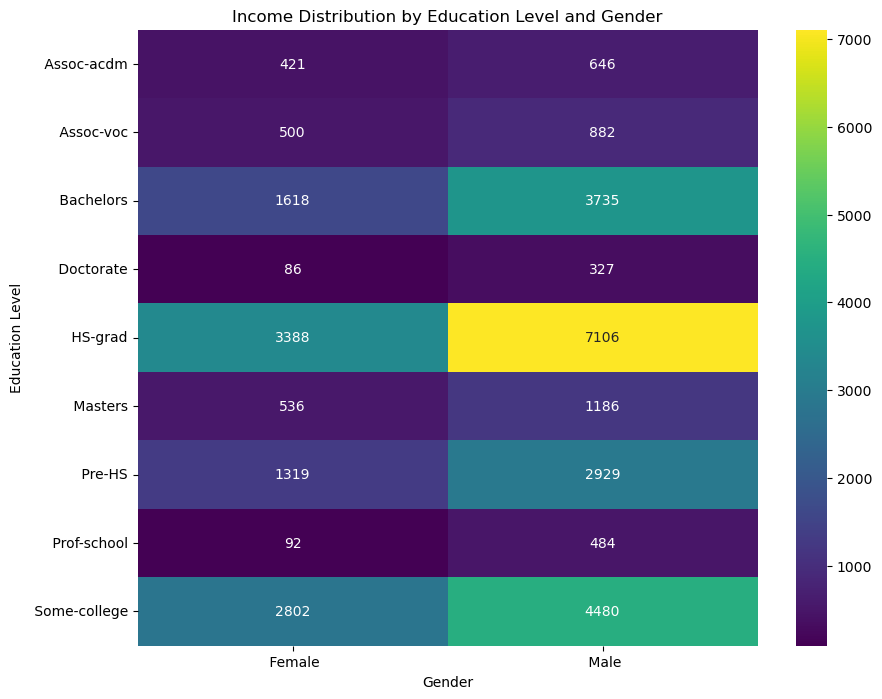

In [70]:

# heatmap: comparing education level, sex, and income
heatmap_data = df.pivot_table(index='education', columns='sex', values='income', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Income Distribution by Education Level and Gender')
plt.xlabel('Gender')
plt.ylabel('Education Level')
plt.show()

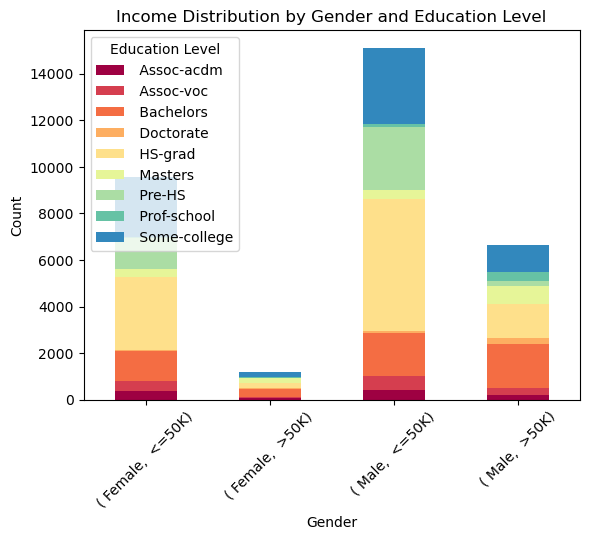

In [77]:
# stacked bar chart: comparing education level and income by sex
stacked_data = df.groupby(['sex', 'income', 'education']).size().unstack(fill_value=0)
colors = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
stacked_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Income Distribution by Gender and Education Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

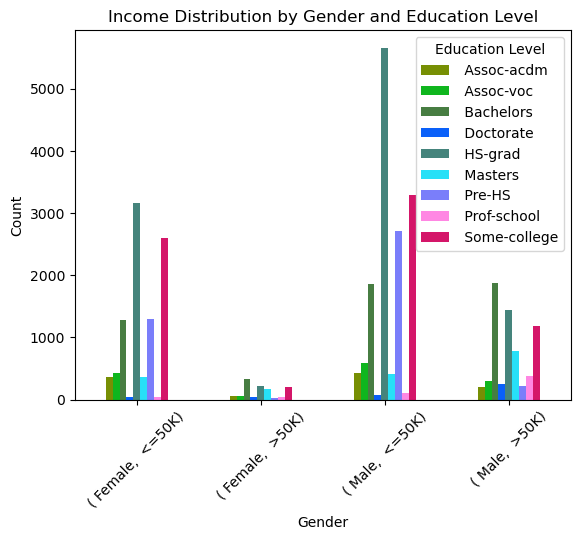

In [72]:

# clustered bar chart: comparing education level and income by sex
colors = ['#778f04', '#0fb61e', '#477d42', '#0a60f9','#45847c','#27e0f7','#7a7efa','#ff87e3','#d41669','#b5641a']
clustered_data = df.groupby(['sex', 'income', 'education']).size().unstack(fill_value=0)
clustered_data.plot(kind='bar', color=colors)
plt.title('Income Distribution by Gender and Education Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

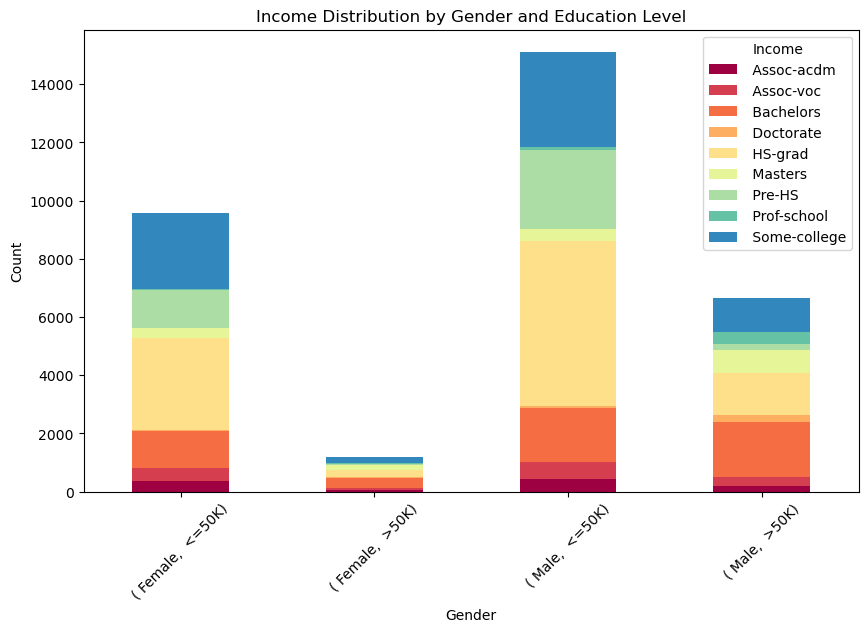

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
#loading data
df = pd.read_csv("/Users/HWAT/Desktop/CodingWork/cleaned_adult_data.csv")
grouped_datas = df.groupby(['sex', 'income', 'education']).size().unstack(fill_value=0)

colors = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']

fig, ax = plt.subplots(figsize=(10,6))
grouped_datas.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.title('Income Distribution by Gender and Education Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

In [74]:
import pandas as pd
import hvplot.pandas
df = pd.read_csv("/Users/HWAT/Desktop/CodingWork/cleaned_adult_data.csv")
# Filter data for women and men earning >50k and <=50k
women_over_50k = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
women_under_50k = df[(df['sex'] == 'Female') & (df['income'] == '<=50K')]
men_over_50k = df[(df['sex'] == 'Male') & (df['income'] == '>50K')]
men_under_50k = df[(df['sex'] == 'Male') & (df['income'] == '<=50K')]

colour = ['#d41669','#ff87e3','#7a7efa','#27e0f7']
# Group data by education level and calculate proportions
grouped_data = df.groupby('education').agg(
    women_over_50k_proportion=('sex', lambda x: (x == ' Female').sum() / len(x)),
    women_under_50k_proportion=('sex', lambda x: (x == ' Female').sum() / len(x)),
    men_over_50k_proportion=('sex', lambda x: (x == ' Male').sum() / len(x)),
    men_under_50k_proportion=('sex', lambda x: (x == ' Male').sum() / len(x))
)

# Plot Hvplot
grouped_data.hvplot.bar(
    stacked=True,
    title='Proportions of Women and Men Earning Over and Under 50k by Education Level',
    xlabel='Education Level',
    ylabel='Proportion',
    rot=45,
    width=800,
    height=400,
    color=colour
)



:Bars   [education,Variable]   (value)

In [75]:

import pandas as pd
import hvplot.pandas
#Use all of the variables, so i am going back to the uncleaned data set
df = pd.read_csv("/Users/HWAT/Desktop/CodingWork/cleaned_adult_data2.csv")
# filtering data for women and men earning >50k and <=50k
women_over50k = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
women_under50k = df[(df['sex'] == 'Female') & (df['income'] == '<=50K')]
men_over50k = df[(df['sex'] == 'Male') & (df['income'] == '>50K')]
men_under_0k = df[(df['sex'] == 'Male') & (df['income'] == '<=50K')]

# group data by education level and calculate proportions
grouped_data = df.groupby('education').agg(
    women_over_50k_proportion=('sex', lambda x: (x == ' Female').sum() / len(x)),
    women_under_50k_proportion=('sex', lambda x: (x == ' Female').sum() / len(x)),
    men_over_50k_proportion=('sex', lambda x: (x == ' Male').sum() / len(x)),
    men_under_50k_proportion=('sex', lambda x: (x == ' Male').sum() / len(x))
)

# plot Hvplot
grouped_data.hvplot.bar(
    stacked=True,
    title='Proportions of Women and Men Earning Over and Under 50k by Education Level',
    xlabel='Education Level',
    ylabel='Proportion',
    rot=45,
    width=800,
    height=400,
    color=colour
)





:Bars   [education,Variable]   (value)